# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [2765]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2766]:
#On importe les données dans un dataframe
df_historique = pd.read_excel("historique.xlsx")

In [2767]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.dtypes


date_mutation       datetime64[ns]
valeur_fonciere            float64
adresse_numero               int64
adresse_nom_voie            object
code_postal                  int64
nom_commune                 object
code_type_local              int64
type_local                  object
surface_reelle               int64
dtype: object

Les variables sont importées dans le format approprié

In [2768]:
## verifier s'il ya des données manquantes
df_historique.isnull().sum()

date_mutation       0
valeur_fonciere     0
adresse_numero      0
adresse_nom_voie    0
code_postal         0
nom_commune         0
code_type_local     0
type_local          0
surface_reelle      0
dtype: int64

Aucune valeur manquante

### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [2769]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
local_types = df_historique['type_local'].unique()
print(local_types)

la liste des différents types de biens immobiliers que nous avons dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']


In [2770]:
codes_type = df_historique['code_type_local'].unique()
print(f" On observe qu'il y a {len(local_types)} types de biens, et que leurs codes types sont {codes_type}. ")

 On observe qu'il y a 2 types de biens, et que leurs codes types sont [2 4]. 


### 3. Nombre de transactions

In [2771]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print(f"le nombre de transactions dans les données est {len(df_historique)}")
print(f"le nombre de transactions pour les appartements dans les données est: {len(df_historique[df_historique['code_type_local'] == 2])}")
print(f"le nombre de transactions pour les locaux commerciaux dans les données est {len(df_historique[df_historique['code_type_local'] == 4])}")

le nombre de transactions dans les données est 26196
le nombre de transactions pour les appartements dans les données est: 24353
le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [2772]:
#On vérifie également la plage de l'historique disponible
print(f"la première date de transaction dans les données est le:{df_historique['date_mutation'].min()}")
print(f"la dernière date de transaction dans les données est le :{df_historique['date_mutation'].max()}")

la première date de transaction dans les données est le:2017-01-02 00:00:00
la dernière date de transaction dans les données est le :2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [2773]:
# Calcul de la colonne

# Créer la colonne du prix au mètre carré
df_historique['prix_m2'] =df_historique['valeur_fonciere'] / df_historique['surface_reelle']

# Afficher les premières lignes pour vérifier
print(df_historique[['valeur_fonciere', 'surface_reelle', 'prix_m2']].head())

   valeur_fonciere  surface_reelle       prix_m2
0     5.505597e+05              50  11011.193562
1     1.576492e+06             163   9671.732877
2     6.577574e+05              66   9966.020548
3     2.500868e+05              22  11367.582877
4     1.762667e+05              15  11751.113836


In [2774]:
#df_historique.head()

## Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [2775]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps

# Filtrer pour ne garder que les appartements
df_historique_appartements = df_historique[df_historique['type_local'] == 'Appartement']

print(df_historique_appartements.columns)

#Supprimer les colonnes inutiles
df_appartement = df_historique_appartements.drop(['adresse_numero', 'adresse_nom_voie', 'nom_commune', 'code_type_local'], axis=1)


# Afficher les premières lignes pour vérifier
df_appartement.head()


Index(['date_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_nom_voie', 'code_postal', 'nom_commune', 'code_type_local',
       'type_local', 'surface_reelle', 'prix_m2'],
      dtype='object')


,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.193562
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.732877
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.020548
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.582877
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.113836


In [2776]:
#Créeons un dataframe pour une  visualisation avec l'evolution des prix au fil des années

# Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée

# Extraire l'année de la colonne 'date_mutation'
df_appartement['annee'] = df_appartement['date_mutation'].dt.year

# Grouper par année et calculer les moyennes
grouped_df = df_appartement.groupby('annee').agg({
    'valeur_fonciere': 'mean',
    'surface_reelle': 'mean',
    'prix_m2' : 'mean'
}).reset_index()

# Renommer les colonnes pour plus de clarté
grouped_df.rename(columns={
    'annee': 'Année',
    'valeur_fonciere': 'Moyenne_Valeur_Fonciere',
    'surface_reelle': 'Moyenne_Surface_Reelle',
    'prix_m2': 'Moyenne_Prix_m2'
}, inplace=True)

# Afficher le DataFrame résultant  
grouped_df.head()

,Année,Moyenne_Valeur_Fonciere,Moyenne_Surface_Reelle,Moyenne_Prix_m2
0,2017,427963.238883,44.627737,9492.859195
1,2018,448055.762541,44.271671,10031.403432
2,2019,461950.057064,43.361645,10562.712581
3,2020,462383.253604,42.900654,10674.872650
4,2021,458771.507203,43.479864,10455.600126


On constate que Moyenne_Valeur_Fonciere à Paris augmente progressivement entre 2017 et 2020, avec une légère baisse enregistrée en 2021. 
Le prix moyen au mètre carré suit la tendance de la valeur foncière moyenne.

Nous allons créer un graphique pour mieux le visualiser.


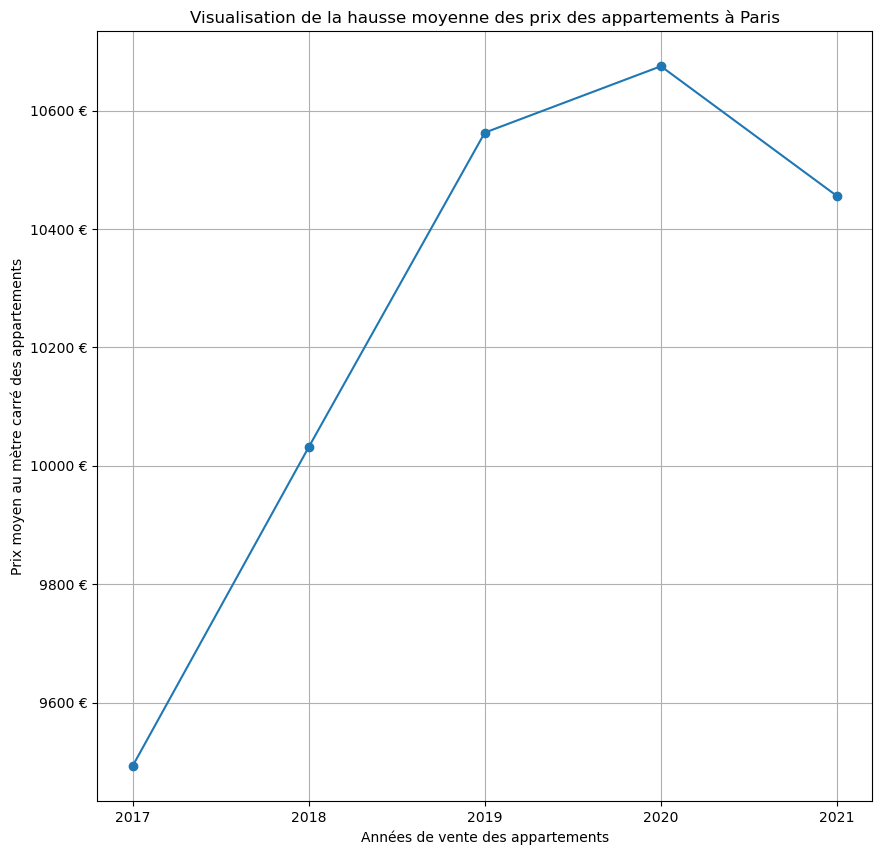

In [2777]:
import matplotlib.ticker as ticker
#Créeons une visualisation avec l'evolution des prix au fil des années

# Définir les données à tracer
# Années et prix moyens correspondants
annees = grouped_df['Année']
prix_moyens = grouped_df['Moyenne_Prix_m2']

# Créer le graphique
plt.figure(figsize=(10, 10))  # Ajustement de la taille du graphique pour plus de lisibilité
plt.plot(annees, prix_moyens, marker='o')

# Ajouter les étiquettes
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix moyen au mètre carré des appartements')

# Utiliser MaxNLocator pour gérer le nombre de labels sur l'axe X
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Formater les prix avec le symbole €
formatter = ticker.FormatStrFormatter('%d €')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouter une grille et un titre
plt.grid(True)
plt.title('Visualisation de la hausse moyenne des prix des appartements à Paris')

# Afficher le graphique
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [2778]:
#Liste des codes postaux dans nos données.

# Extraire la liste des codes postaux uniques
codes_postaux = df_appartement['code_postal'].unique()

# Afficher la liste des codes postaux
print(codes_postaux)


[75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [2779]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement

# Grouper par arrondissement et calculer les moyennes
Evolution_prix_arrondissement = df_appartement.groupby('code_postal').agg({
    'valeur_fonciere': 'mean',
    'prix_m2' : 'mean',
    'surface_reelle':'mean' 
}).reset_index()

# Renommer les colonnes pour plus de clarté
Evolution_prix_arrondissement.rename(columns={
    'valeur_fonciere': 'prix_moyen_vente',
    'prix_m2' : 'prix_moyen_au_m2',
    'surface_reelle': 'surface_moyenne'
}, inplace=True)

# Afficher le DataFrame résultant
Evolution_prix_arrondissement.head()

,code_postal,prix_moyen_vente,prix_moyen_au_m2,surface_moyenne
0,75001,554648.249715,12833.901606,43.320293
1,75002,460325.138421,11667.515820,39.456456
2,75003,514599.519661,12465.625014,41.197704
3,75004,572361.829686,13123.567058,43.565693
4,75005,459687.781826,12295.086811,37.475271


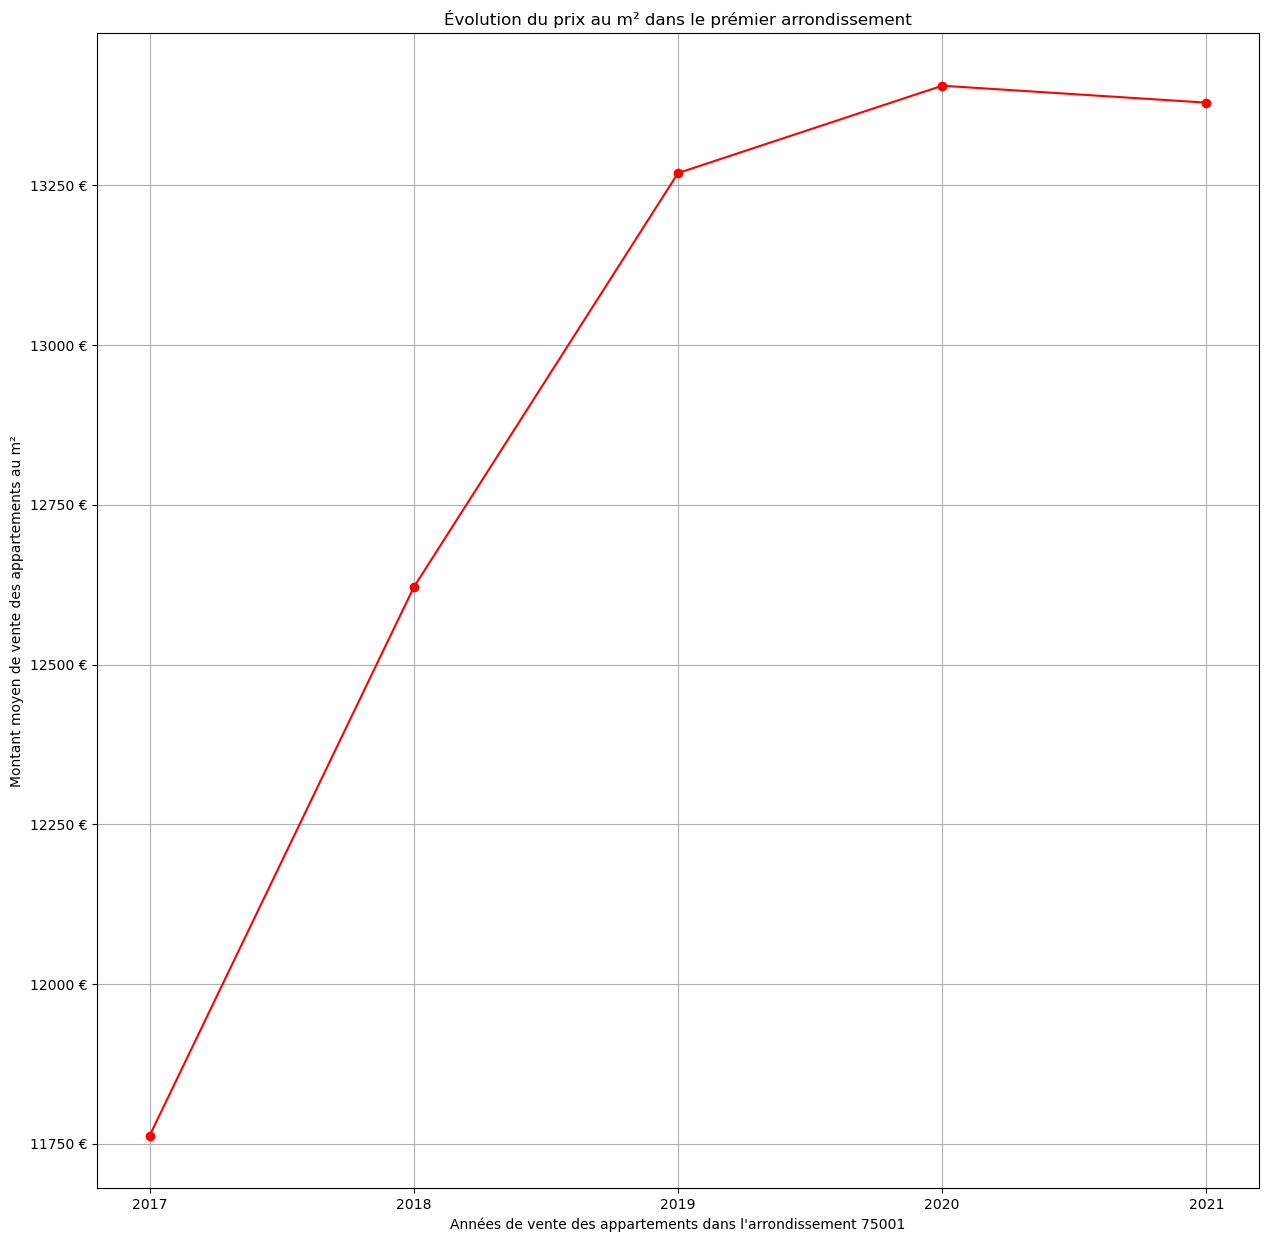

In [2780]:
# Création d'un graphique pour visualiser la hausse de la moyenne des prix au mètre carré dans le prémier arrondissement

# Filtrer pour le premier arrondissement (75001)
codes_postaux.sort()
code_premier_arrondissement = codes_postaux[0]
premier_arrondissement = df_appartement[df_appartement['code_postal'] == code_premier_arrondissement].copy()

# Extraire l'année de la colonne 'date_mutation'
premier_arrondissement['annee'] = pd.to_datetime(premier_arrondissement['date_mutation']).dt.year

# Grouper par année et calculer la moyenne des prix au m²
prix_m2_par_annee = premier_arrondissement.groupby('annee').agg({
    'prix_m2' : 'mean', 
})

# Créer le graphique
plt.figure(figsize=(15, 15))
plt.plot(prix_m2_par_annee.index.astype(str), prix_m2_par_annee, color='red', marker='o')

# Ajouter les étiquettes
plt.xlabel(f'Années de vente des appartements dans l\'arrondissement {code_premier_arrondissement}')
plt.ylabel('Montant moyen de vente des appartements au m²')

# Formater les prix avec le symbole €
formatter = ticker.FormatStrFormatter('%d €')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouter une grille et un titre
plt.grid()
plt.title('Évolution du prix au m² dans le prémier arrondissement')

# Afficher le graphique
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

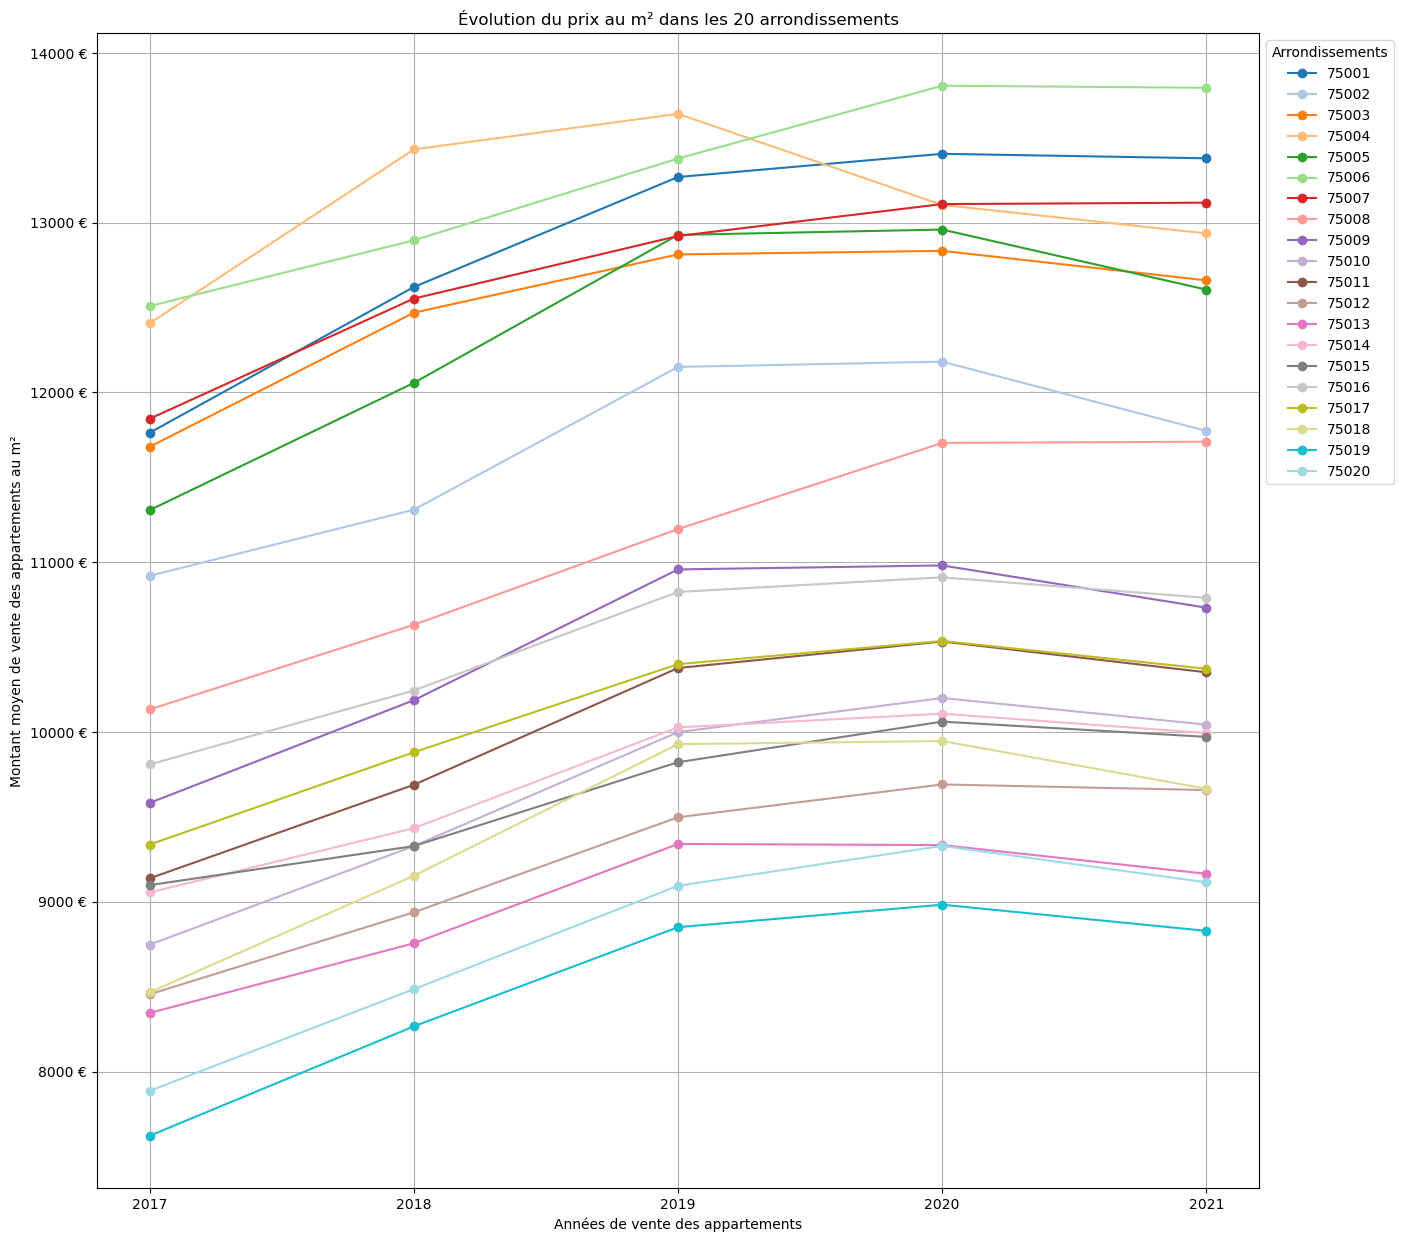

In [2781]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris

# Créer une palette de couleurs pour les arrondissements
colors = plt.colormaps[f'tab{len(codes_postaux)}'].colors

# Créer le graphique
plt.figure(figsize=(15,15))

# Boucle à travers chaque arrondissement
for i, code in enumerate(codes_postaux):
    # Filtrer les données pour chaque arrondissement
    arr_data = df_appartement[df_appartement['code_postal'] == code].copy()
    
    # Extraire l'année de la colonne 'date_mutation'
    arr_data['annee'] = pd.to_datetime(arr_data['date_mutation']).dt.year

    # Grouper par année et calculer la moyenne des prix au m²
    prix_m2_par_annee = arr_data.groupby('annee').agg({
        'prix_m2' : 'mean',
    })
    
    # Insérer les lignes à tracer
    plt.plot(prix_m2_par_annee.index.astype(str), prix_m2_par_annee, color=colors[i % len(colors)], marker='o', label=f'{code}')

# Ajouter les étiquettes et la légende
plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements au m²')
formatter = ticker.FormatStrFormatter('%d €')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title(f'Évolution du prix au m² dans les {len(codes_postaux)} arrondissements')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Arrondissements")

# Afficher le graphique
plt.show()

On observe que globalement le prix des appartements à Paris a augmenté de façon continue dans les 20 arrondissements entre 2017 et 2019, avec une relative stabilité en 2020, suivie d'une légère baisse en 2021. Par ailleurs, le prix au mètre carré varie d'un arrondissement à l'autre.

### 7. Prix au metre carré par transaction dans un arrondissement

In [2782]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
code_arr_6 = codes_postaux[5]

# Filtrer les données pour le 6ème arrondissement
arrondissement_6 = df_appartement[df_appartement['code_postal'] == code_arr_6]

# Compter le nombre de transactions
nombre_transactions = arrondissement_6.shape[0]

print(f"Nombre de transactions dans le 6ème arrondissement : {nombre_transactions}")


Nombre de transactions dans le 6ème arrondissement : 709


On observe que le volume de transactions dans cet arrondissement est de 709 sur un total de 24 353 transactions pour l'ensemble des 20 arrondissements. Cela correspond à une moyenne d'environ 1 217 transactions par arrondissement. Avec seulement 709 transactions, ce chiffre est relativement inférieur à la moyenne, ce qui pourrait suggérer une activité immobilière modérée dans cet arrondissement.


Affichons l'historique des transactions pour visualiser la dispersion des données :

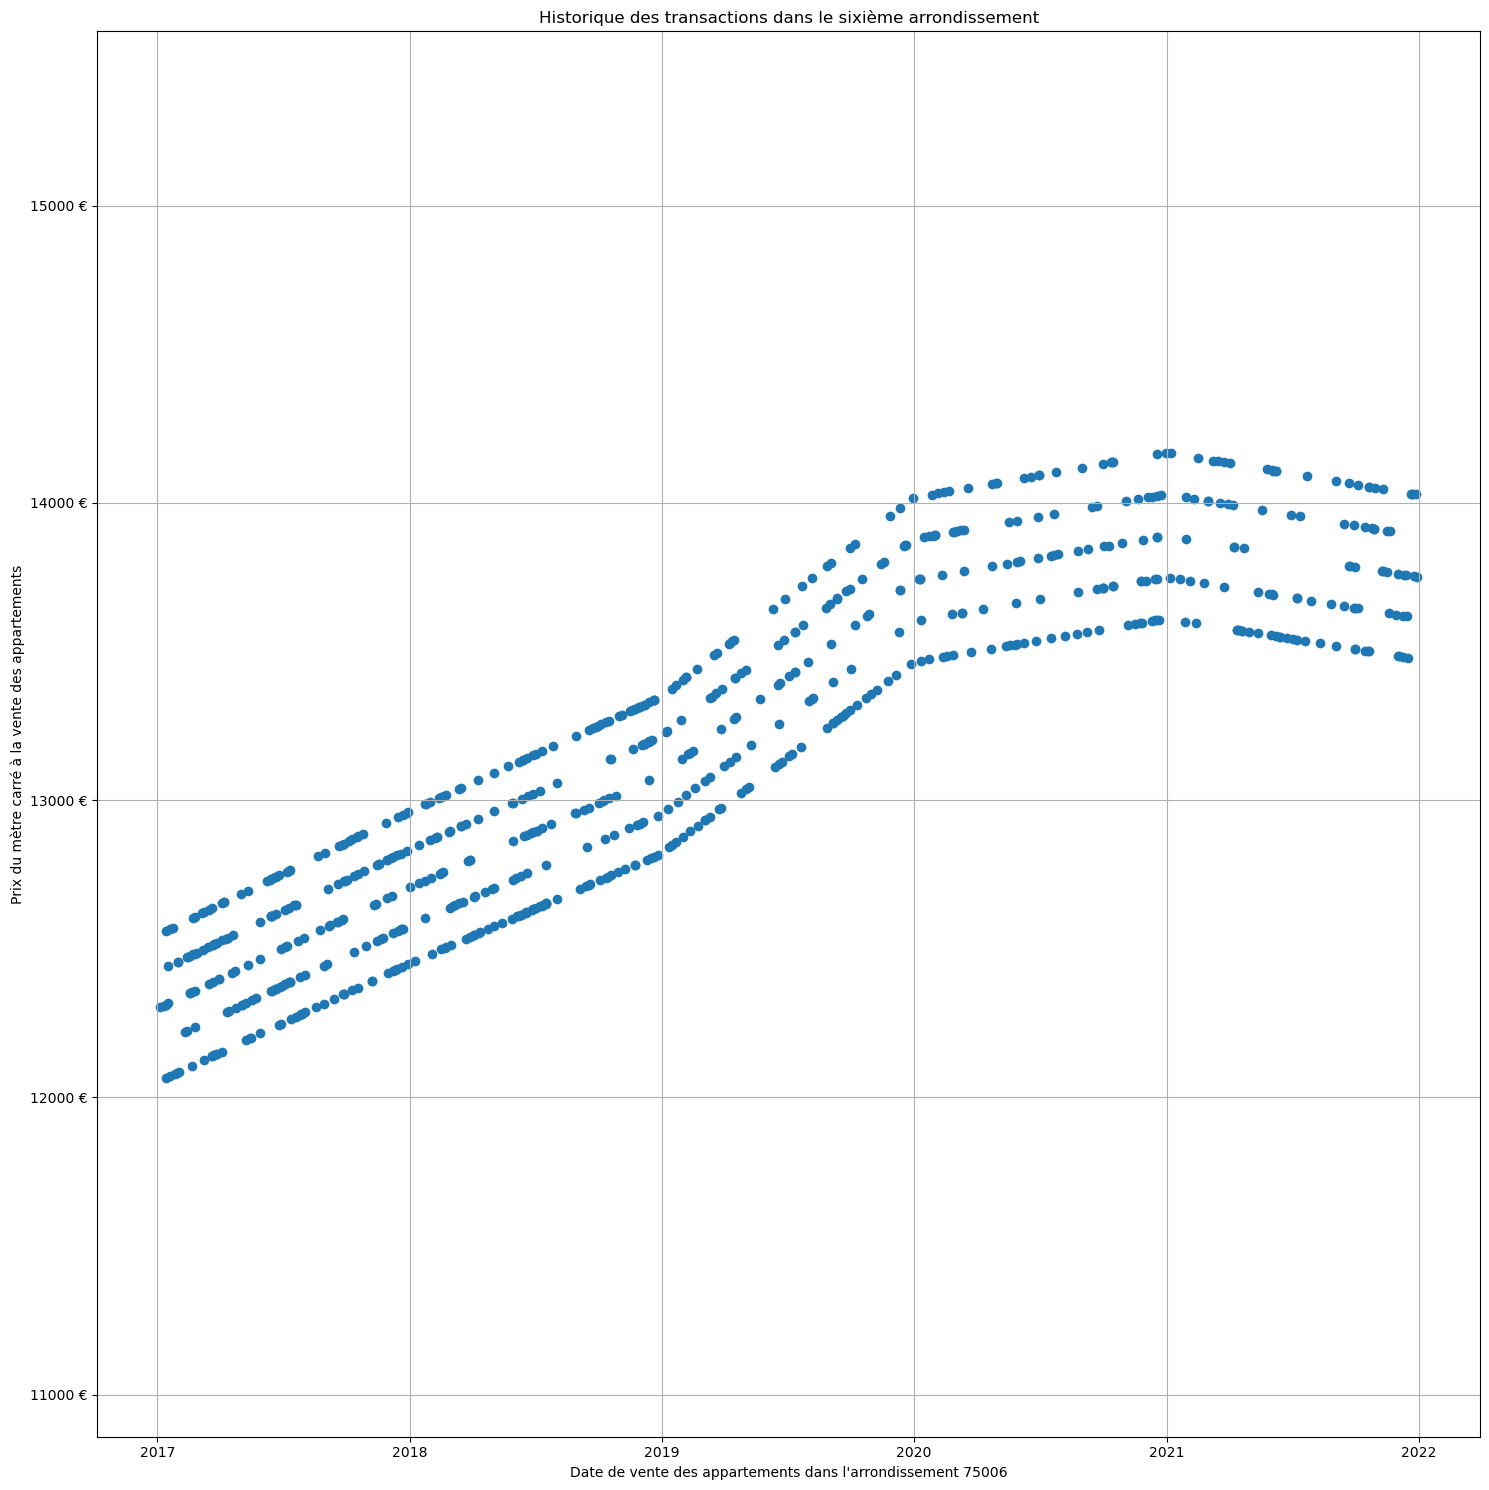

In [2783]:
# Créer le graphique de dispersion
plt.figure(figsize=(15, 15))

# Utiliser la colonne réelle 'date_mutation' pour l'axe X
plt.scatter(arrondissement_6['date_mutation'], arrondissement_6['prix_m2'])

# Ajouter les étiquettes des axes
plt.xlabel(f"Date de vente des appartements dans l'arrondissement {code_arr_6}")
plt.ylabel('Prix du mètre carré à la vente des appartements')

# Formater les prix avec le symbole €
formatter = ticker.FormatStrFormatter('%d €')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajuster les limites de l'axe y
plt.ylim(arrondissement_6['prix_m2'].min() * 0.9, arrondissement_6['prix_m2'].max() * 1.1)

# Ajouter une grille pour l'axe majeur et mineur
plt.grid(which='both')

# Ajouter un titre au graphique
plt.title('Historique des transactions dans le sixième arrondissement')

# Rotation des dates pour une meilleure lisibilité
#plt.xticks(rotation=45)  

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

On observe que la dispersion des données est constate malgré l'augmentation du prix moyen par mètre carré au fil de temps dans le 6ème arrondissement de Paris.
Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [2784]:
#On calcule la corrélation de Pearson
from scipy.stats import pearsonr

# Filtrer les données pour le 6ème arrondissement
arrondissement_6 = df_appartement[df_appartement['code_postal'] == code_arr_6].copy()

# Convertir la date de mutation en datetime
arrondissement_6['date_mutation'] = pd.to_datetime(arrondissement_6['date_mutation'])

# Extraire l'année de la date de mutation
arrondissement_6['annee'] = arrondissement_6['date_mutation'].dt.year

# Sélectionner les variables d'intérêt
prix_m2 = arrondissement_6['prix_m2']
annees = arrondissement_6['annee']

# Calculer la corrélation de Pearson
pearson_result = pearsonr(prix_m2, annees)

print(f"Le coefficient de corrélation de Pearson entre le prix au m² et l'année est : {pearson_result.statistic}")
print(f"Valeur p Pearson : {pearson_result.pvalue}")

Le coefficient de corrélation de Pearson entre le prix au m² et l'année est : 0.8916242114040727
Valeur p Pearson : 1.7235314882819073e-245


Le coefficient de corrélation est de 0.89 avec une pvalue de 1.7235314882819073e-245. La relation est donc confirmée.

Le coefficient de corrélation est de 0.89, ce qui est proche de 1 et indique une forte corrélation positive entre les deux variables. Cela signifie que lorsque l'une augmente, l'autre tend à augmenter également.

La p-value de 1.724e-245 est extrêmement faible, bien en dessous de 0.05, ce qui permet de rejeter l'hypothèse nulle (absence de corrélation) avec un très haut niveau de confiance.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [2785]:
# Calcul du coefficient de corrélation de Pearson entre la valeur foncière et la surface

pearson_result = pearsonr(arrondissement_6['valeur_fonciere'], arrondissement_6['surface_reelle'])
print(f"Le coefficient de corrélation de Pearson entre la valeur foncière et la surface est : {pearson_result.statistic}")
print(f"P-value : {pearson_result.pvalue}")


Le coefficient de corrélation de Pearson entre la valeur foncière et la surface est : 0.9977572898250283
P-value : 0.0


Le coefficient de corrélation est de 0.99 avec une pvalue de 0.00. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [2786]:
# On crée un dataset qui ne contient que les locaux commerciaux

# Filtrer les locaux industriels, commerciaux ou assimilés
historique_locaux = df_historique[df_historique['type_local'] == 'Local industriel. commercial ou assimilé']

#historique_locaux.head()


In [2787]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

historique_loc = historique_locaux.copy()  # Copie le DataFrame avant modification

# Extraire l'année à partir de la colonne 'date_mutation' 
historique_loc['annee'] = pd.to_datetime(historique_loc['date_mutation']).dt.year


# Regrouper par année et calculer la moyenne des prix au m²
prix_m2_par_annee = historique_loc.groupby('annee')['prix_m2'].mean().reset_index()

# Renommer les colonnes pour plus de clarté
prix_m2_par_annee.columns = ['Année', 'Prix moyen au mètre carré']

# Afficher le nouveau dataframe
print(prix_m2_par_annee)



   Année  Prix moyen au mètre carré
0   2017               10949.909217
1   2018               11569.499180
2   2019               11960.132050
3   2020               11966.470204
4   2021               12006.488691


Le prix au mètre carré des locaux commerciaux varie entre 10 950€ et 12 000€, indiquant une augmentation continue entre 2017 et 2021.


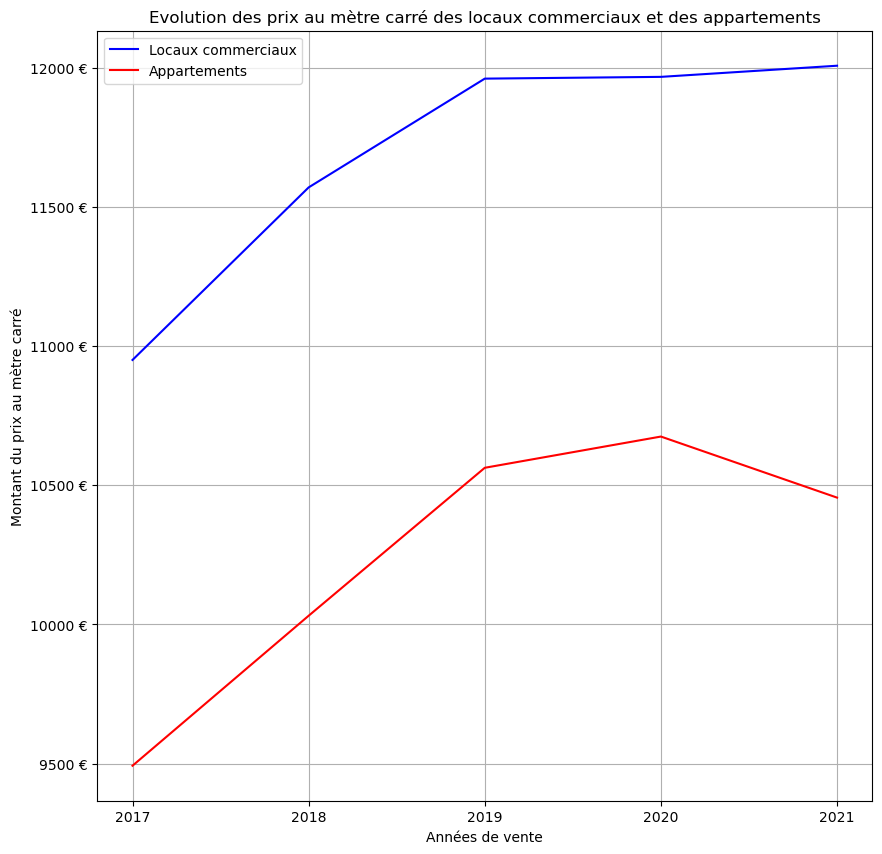

In [2788]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix

# Extraire les années et les prix moyens au mètre carré pour les locaux commerciaux
annees = prix_m2_par_annee['Année']
prix_moyen_locaux = prix_m2_par_annee['Prix moyen au mètre carré']

# Faire de même pour les appartements
prix_moyen_appart = grouped_df['Moyenne_Prix_m2']

# Création du graphique
plt.figure(figsize=(10,10))
plt.plot(annees, prix_moyen_locaux, label='Locaux commerciaux', color='blue')
plt.plot(annees, prix_moyen_appart, label='Appartements', color='red')

# Ajouter des étiquettes et le titre
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au mètre carré')
plt.legend()   

# Utiliser MaxNLocator pour gérer le nombre de labels sur l'axe X
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Formater l'axe des ordonnées en euros
formatter = ticker.FormatStrFormatter('%d €')
plt.gca().yaxis.set_major_formatter(formatter)

# Ajouter une grille
plt.grid()

# Titre du graphique
plt.title('Evolution des prix au mètre carré des locaux commerciaux et des appartements')

# Afficher le graphique
plt.show()

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [2789]:
# préparation de données

#On importe la librairie datetime pour pouvoir créer une colonne timestamp 
import datetime as dt
df_historique["timestamp"] = df_historique['date_mutation'].astype('datetime64[ns]').astype('int64') / 10**9

# Transformation des colonnes catégoriques grâce au one hot encoder (sklearn) 

from sklearn.preprocessing import OneHotEncoder

# Instancier l'encodeur
encoder = OneHotEncoder(sparse_output=False)

# Appliquer sur les colonnes catégoriques
encoded_columns = encoder.fit_transform(df_historique[['code_postal', 'type_local']])

# Convertir en entier
encoded_columns = encoded_columns.astype(int)

# Remplacer les colonnes code_postal et type_local par les nouvelles colonnes dans le DataFrame
df_encoded = pd.concat([df_historique.drop(['code_postal', 'type_local'], axis=1), 
                        pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())], axis=1)

# Affichage du DataFrame encodé
#df_encoded.head()

In [1]:
# suppression de colonnes inutiles
df_encoded = df_encoded.drop(['adresse_nom_voie', 'nom_commune', 'adresse_numero','code_type_local', 'date_mutation', 'prix_m2' ],axis=1)
df_encoded.head()

NameError: name 'df_encoded' is not defined

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [2791]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# La valeur y à trouver est la valeur foncière
# Séparer les variables prédictives (X) et la variable cible (y)
X = df_encoded.drop('valeur_fonciere', axis=1)  
y = df_encoded['valeur_fonciere']

# Séparer les données en ensembles d'entraînement (67%) et de test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

print(f"X_train: {X_train.shape[0]}") 
print(f"X_test: {X_test.shape[0]} ")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 17551
X_test: 8645 
y_train: 17551
y_test: 8645


X_train, X_test, y_train, y_test = [17551, 8645, 17551, 8645]

In [2792]:
# conversion des données en str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [2793]:
from sklearn.linear_model import LinearRegression

#On entraîne l'algorithme et on effectue la prédiction
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [2794]:
from sklearn.metrics import mean_absolute_error

# Prédire sur l'ensemble de test
y_pred = reg.predict(X_test)

# Calculer l'erreur absolue et relative
erreurs_absolues = abs(y_test - y_pred)
erreurs_relatives = erreurs_absolues / y_test

# Calculer la moyenne des erreurs relatives et la convertir en pourcentage
pourcentage_moyen_erreur = np.mean(erreurs_relatives) * 100

# Afficher le résultat
print(f"Le pourcentage moyen d'erreur est de : {pourcentage_moyen_erreur:.2f}%")


Le pourcentage moyen d'erreur est de : 8.80%


In [2795]:
# Évaluation de l'Impact du Paramètre random_state sur l'Erreur de Prédiction

# Liste pour stocker les erreurs pour chaque random_state
erreur = []

# Tester différentes valeurs de random_state
for k in range(2, 40):
    # Séparation des données en train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=k)
    
    # Entraîner le modèle
    reg.fit(X_train, y_train)
    
    # Faire des prédictions
    y_pred = reg.predict(X_test)
    
    # Calculer l'erreur absolue et relative
    erreurs_absolues = abs(y_test - y_pred)
    erreurs_relatives = erreurs_absolues / y_test
    
    # Calculer la moyenne des erreurs relatives en pourcentage
    pourcentage_moyen_erreur = np.mean(erreurs_relatives) * 100
    
    # Ajouter la valeur de random_state et l'erreur correspondante dans la liste
    erreur.append((k, pourcentage_moyen_erreur))

# Trier la liste d'erreurs par la valeur d'erreur (ordre croissant)
erreur.sort(key=lambda x: x[1])

# Afficher les valeurs de random_state et les erreurs correspondantes triées
for random_state, err in erreur:
    print(f"random_state: {random_state}, Erreur (%): {err:.2f}")



random_state: 13, Erreur (%): 8.80
random_state: 23, Erreur (%): 8.83
random_state: 39, Erreur (%): 8.86
random_state: 6, Erreur (%): 8.93
random_state: 7, Erreur (%): 8.97
random_state: 20, Erreur (%): 8.99
random_state: 36, Erreur (%): 9.04
random_state: 15, Erreur (%): 9.05
random_state: 11, Erreur (%): 9.06
random_state: 3, Erreur (%): 9.06
random_state: 35, Erreur (%): 9.06
random_state: 26, Erreur (%): 9.07
random_state: 19, Erreur (%): 9.08
random_state: 18, Erreur (%): 9.09
random_state: 5, Erreur (%): 9.09
random_state: 30, Erreur (%): 9.11
random_state: 10, Erreur (%): 9.12
random_state: 31, Erreur (%): 9.12
random_state: 25, Erreur (%): 9.13
random_state: 28, Erreur (%): 9.17
random_state: 37, Erreur (%): 9.18
random_state: 12, Erreur (%): 9.18
random_state: 32, Erreur (%): 9.22
random_state: 24, Erreur (%): 9.24
random_state: 16, Erreur (%): 9.24
random_state: 22, Erreur (%): 9.27
random_state: 2, Erreur (%): 9.27
random_state: 33, Erreur (%): 9.30
random_state: 21, Erreur 

Notre algorithme fait donc 8.80 % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :

Le modèle de régression linéaire présente un pourcentage moyen d'erreur de 8.80%, ce qui est considéré comme acceptable ( inférieur à 10%) dans certains contextes. 

Cependant, une meilleure sélection de variables ou l'utilisation des modèles plus complexes comme la régression polynomiale, les forêts aléatoires ou les arbres de décisions puissent améliorer les résultats. 

Cependant, la régression linéaire peut sous-modéliser si les relations entre les variables ne sont pas linéaires. 

Évaluer la performance uniquement via l'erreur moyenne absolue (MAE) peut être insuffisant, et il serait utile d'utiliser des métriques complémentaires telles que l'erreur quadratique moyenne (RMSE) ou le coefficient de détermination (R²)..


# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [2796]:
#On importe les données dans un dataframe
df_actifs = pd.read_excel("portefeuille_actifs.xlsx")
# df_actifs.head()

Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

# Type des données

In [2797]:
# vérifiction de types de données
df_actifs.dtypes

adresse_numero                 int64
adresse_nom_voie              object
code_postal                    int64
code_commune                   int64
nom_commune                   object
surface_carrez               float64
code_type_local                int64
type_local                    object
surface_reelle_bati            int64
nombre_pieces_principales      int64
longitude                    float64
latitude                     float64
dtype: object

Les variables sont importées dans le format approprié

In [2798]:
# vérifiction de valeurs manquantes
df_actifs.isnull().sum()

adresse_numero               0
adresse_nom_voie             0
code_postal                  0
code_commune                 0
nom_commune                  0
surface_carrez               0
code_type_local              0
type_local                   0
surface_reelle_bati          0
nombre_pieces_principales    0
longitude                    0
latitude                     0
dtype: int64

Aucune valeurs manquantes

## Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [2799]:
print('la liste des différents types de biens immobiliers que nous avons dans les données est :')
local_types = df_actifs['type_local'].unique()
print(local_types)

la liste des différents types de biens immobiliers que nous avons dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']


In [2800]:
codes_type = df_actifs['code_type_local'].unique()
print(f" On observe qu'il y a {len(local_types)} types de biens, et que leurs codes types sont {codes_type}. ")

 On observe qu'il y a 2 types de biens, et que leurs codes types sont [2 4]. 


## Nombre da la trasaction

In [2801]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print(f"le nombre de transactions dans les données est {len(df_actifs)}")
print(f"le nombre de transactions pour les appartements dans les données est: {len(df_actifs[df_actifs['code_type_local'] == 2])}")
print(f"le nombre de transactions pour les locaux commerciaux dans les données est {len(df_actifs[df_actifs['code_type_local'] == 4])}")

le nombre de transactions dans les données est 275
le nombre de transactions pour les appartements dans les données est: 154
le nombre de transactions pour les locaux commerciaux dans les données est 121


In [2802]:
print(df_actifs.columns)

Index(['adresse_numero', 'adresse_nom_voie', 'code_postal', 'code_commune',
       'nom_commune', 'surface_carrez', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude',
       'latitude'],
      dtype='object')


In [2803]:
#Supprimer les colonnes inutiles
df_actifs = df_actifs.drop(['adresse_numero', 'adresse_nom_voie', 'code_commune',
                            'nom_commune','surface_carrez', 'code_type_local', 
                            'nombre_pieces_principales', 'longitude', 'latitude'], axis=1)

In [2804]:
#rennomer la colonne surface_reelle_bati
df_actifs.rename(columns={'surface_reelle_bati':'surface_reelle'}, inplace=True)
#df_actifs.head()

In [2805]:
# On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

# Instancier l'encodeur
encoder = OneHotEncoder(sparse_output=False)

# Appliquer sur les colonnes catégoriques
encoded_columns = encoder.fit_transform(df_actifs[['code_postal', 'type_local']])

# Convertir en entier
encoded_columns = encoded_columns.astype(int)

# Ajouter les nouvelles colonnes dans le DataFrame
df_actifs_encoded = pd.concat([df_actifs.drop(['code_postal', 'type_local'], axis=1), 
                        pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out())], axis=1)


# créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction

df_actifs_encoded['timestamp']=int(dt.datetime(2022, 12, 31).timestamp())


In [2806]:
# Conversion du dataframe en str
df_actifs_encoded.columns = df_actifs_encoded.columns.astype(str)

In [2807]:
df_actifs_encoded = df_actifs_encoded[reg.feature_names_in_]

In [2808]:
# On effectue la prédiction
# le modèle de régression 'reg' est déjà entraîné précédemment
y_pred = reg.predict(df_actifs_encoded)

#On vérifie les 10 premières valeurs
print("\n10 premières valeurs prédites :")
print(y_pred[:10])


10 premières valeurs prédites :
[435952.4540643  366713.77776656 822473.96370235 877062.97442947
 325911.1216699  463699.0848598  387911.92594962 642437.96457754
 142464.52115938 143015.81728294]


In [2809]:
# afficher les valeurs prédites sous forme de DataFrame pour plus de clarté

# Création d'un DataFrame pour les valeurs prédites
y_pred_df = pd.DataFrame(y_pred, columns=['valeur_fonciere_predite'])

# Afficher les 10 premières valeurs avec les entrées correspondantes
df_actifs = pd.concat([df_actifs_encoded.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)

df_actifs.head()

,surface_reelle,timestamp,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,valeur_fonciere_predite
0,25,1672441200,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,435952.454064
1,22,1672441200,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,366713.777767
2,65,1672441200,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,822473.963702
3,74,1672441200,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,877062.974429
4,22,1672441200,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,325911.121670


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [2810]:
#Valorisation du portefeuille sur le segment des particuliers
valorisation_1 = df_actifs[df_actifs['type_local_Appartement'] == 1]['valeur_fonciere_predite'].sum() / 1000000

# Afficher le résultat
print('La valorisation du segment particulier est (en millions d\'euros) :', valorisation_1)

La valorisation du segment particulier est (en millions d'euros) : 71.02599862170031


In [2811]:
#Valorisation du portefeuille sur le segment corporate
valorisation_2 = df_actifs[df_actifs['type_local_Local industriel. commercial ou assimilé'] == 1]['valeur_fonciere_predite'].sum() / 1000000

print('La valorisation du segment corporate est (en millions d\'euros) :', valorisation_2)

La valorisation du segment corporate est (en millions d'euros) : 98.00548164874378


##### Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
À la date du 31 décembre 2022, la valorisation prédite pour les deux segments — particulier et corporate — est la suivante :

Segment particulier : 72 millions d'euros

Segment corporate : 98 millions d'euros

D'après ces prédictions, le segment corporate est nettement plus valorisé que le segment particulier, avec une différence de 26 millions d'euros en faveur du segment corporate. 
Le segment corporate présente donc un potentiel économique plus élevé en termes de valorisation foncière.

Cela peut être dû à plusieurs facteurs :

-La taille ou la nature des propriétés (immobilier commercial ou industriel) dans le portefeuille corporate, qui tendent à avoir une valeur plus élevée.

-Une concentration de biens dans des zones à forte demande ou à plus haute valeur foncière.

Cette conclusion pourrait influencer les priorités de l'entreprise, comme la concentration des efforts sur le segment corporate pour maximiser les retours financiers ou explorer des opportunités d'investissement supplémentaires.

##### Limites de l'estimation
Les prédictions dépendent fortement de la qualité des données et de l’entraînement du modèle, ce qui peut entraîner des erreurs si ces éléments sont biaisés ou incomplets. Les conditions du marché immobilier peuvent évoluer, rendant les prédictions moins fiables face à des événements imprévisibles. Enfin, la segmentation entre particuliers et corporates peut simplifier le marché et manquer de nuances importantes.

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé

Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [2812]:
#On importe les données dans un dataframe
df_echantill = pd.read_excel(r"echantillon.xlsx")

# Affichage des premières lignes
df_echantill.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


In [2813]:
df_echantill.dtypes

valeur_fonciere    float64
code_postal          int64
nom_commune         object
surface_reelle       int64
dtype: object

Les données sont importées avec le bon format

On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [2814]:
## Créer la colonne "prix_par_metre_carre"
df_echantill['prix_au_m²'] = df_echantill['valeur_fonciere'] / df_echantill['surface_reelle']

df_echantill.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_au_m²
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.444128
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.572493
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.697790
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.142168
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.610005


In [2815]:
#On retire les colonnes unitules
df_echantill = df_echantill.drop(['valeur_fonciere', 'code_postal', 'nom_commune', 'surface_reelle'], axis=1)
df_echantill.head()

,prix_au_m²
0,9871.444128
1,10045.572493
2,9194.697790
3,9469.142168
4,7463.610005


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [2816]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

# On vérifie les données de la prédiction
# Importation de KMeans 
from sklearn.cluster import KMeans

# Sélection des données pour le clustering
X = df_echantill[['prix_au_m²']]  # le prix au m² est la variable explicative utilisée pour segmenter les biens immobiliers.

# Initialisation et application de KMeans 

kmeans = KMeans(n_clusters=2, random_state=42) # pour diviser les biens en appartements et locaux commerciaux.
df_echantill['label'] = kmeans.fit_predict(X) #  regrouper les biens dans deux clusters (0 ou 1), correspondant à l’un des types de biens.

# Interpréter les clusters
# Examiner les centres des clusters pour savoir lequel correspond aux appartements et lequel aux locaux

print("Centres des clusters (prix_au_m²) : ", kmeans.cluster_centers_) # Affiche les centres des deux clusters créés par l'algorithme.

# Le centre le plus élevé (9806.92€) correspond aux Locaux commerciaux' et moins élevé (7408.77€) correspond aux appartements.

# Afficher les premières lignes avec les labels
df_echantill.head()
 


Centres des clusters (prix_au_m²) :  [[7408.77502952]
 [9806.92467429]]


,prix_au_m²,label
0,9871.444128,1
1,10045.572493,1
2,9194.697790,1
3,9469.142168,1
4,7463.610005,0


In [2817]:
# Trier df_echantillon par la colonne 'prix' dans l'ordre décroissant
df_echantillon_trié = df_echantill.sort_values(by='prix_au_m²', ascending=False)
print(df_echantillon_trié)

      prix_au_m²  label
32  10113.195822      1
27  10103.161577      1
1   10045.572493      1
38   9983.591800      1
5    9982.016919      1
18   9978.784822      1
26   9961.146860      1
17   9949.544452      1
0    9871.444128      1
13   9869.462342      1
22   9815.972258      1
8    9789.051438      1
39   9771.486096      1
30   9734.720495      1
36   9715.531658      1
6    9674.262777      1
28   9597.631488      1
11   9518.076103      1
3    9469.142168      1
2    9194.697790      1
31   7666.071700      0
9    7616.420959      0
29   7613.514621      0
37   7583.980837      0
33   7577.044521      0
10   7490.469041      0
4    7463.610005      0
23   7437.880186      0
16   7415.564351      0
24   7399.266027      0
7    7348.917415      0
14   7343.539315      0
20   7322.570548      0
15   7313.114384      0
25   7306.810274      0
19   7296.900510      0
34   7294.202055      0
35   7239.983240      0
12   7238.422973      0
21   7207.217630      0


Le cluster 1 correspond aux prix au m² les plus élevés, donc à celui des locaux commerciaux, tandis que le cluster 0 correspond aux appartements

In [2818]:
# Classification des biens en fonction des clusters 
# Ajouter les labels correspondants

df_echantillon_trié['type_bien'] = df_echantillon_trié['label'].apply(lambda x: 'Appartement' if x == df_echantillon_trié['label'].mode()[0] else 'Local industriel ou commercial')
df_echantillon_trié.head()

,prix_au_m²,label,type_bien
32,10113.195822,1,Local industriel ou commercial
27,10103.161577,1,Local industriel ou commercial
1,10045.572493,1,Local industriel ou commercial
38,9983.591800,1,Local industriel ou commercial
5,9982.016919,1,Local industriel ou commercial


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement.

In [2819]:
#On affiche les résultats
# Remplacez les 0 par "Local industriel" et les 1 par "Appartement" dans la colonne "label" 

df_echantillon_trié['label'] = df_echantillon_trié['label'].replace({1: 'Local industriel. commercial ou assimilé', 0: 'Appartement'})

#df_echantillon_trié.head(40)

In [2820]:
# Suppression de la colonne type_bien car contient les meme données que la colonne label

df_echantillon_trié = df_echantillon_trié.drop(columns=['type_bien'])

# Optionnel : Affichage des premières lignes pour vérifier la suppression
print(df_echantillon_trié)

      prix_au_m²                                     label
32  10113.195822  Local industriel. commercial ou assimilé
27  10103.161577  Local industriel. commercial ou assimilé
1   10045.572493  Local industriel. commercial ou assimilé
38   9983.591800  Local industriel. commercial ou assimilé
5    9982.016919  Local industriel. commercial ou assimilé
18   9978.784822  Local industriel. commercial ou assimilé
26   9961.146860  Local industriel. commercial ou assimilé
17   9949.544452  Local industriel. commercial ou assimilé
0    9871.444128  Local industriel. commercial ou assimilé
13   9869.462342  Local industriel. commercial ou assimilé
22   9815.972258  Local industriel. commercial ou assimilé
8    9789.051438  Local industriel. commercial ou assimilé
39   9771.486096  Local industriel. commercial ou assimilé
30   9734.720495  Local industriel. commercial ou assimilé
36   9715.531658  Local industriel. commercial ou assimilé
6    9674.262777  Local industriel. commercial ou assimi

### Milestone 5 - Analyse et présentation des résultats¶

#### Mes conclusions sur l'analyse et les limites de l'exercice :
Entre 2017 et 2020, le prix au mètre carré des appartements à Paris a augmenté, suivi d'une légère baisse en 2021. Une analyse par arrondissement montre une tendance similaire sur la même période (2017-2020). 

Le prix au m² des locaux commerciaux a augmenté continuellement, passant de 10 950 € à 12 000 € entre 2017 et 2021, tandis que le prix au m² des appartements est passé de 9 492 € à 10 674 € entre 2017 et 2019, avec une relative stabilité en 2020, suivie d'une légère baisse en 2021. 

Les tests de corrélation montrent une forte relation entre la valeur foncière et la surface, ainsi qu'entre le prix au m² et la date dans le 6ème arrondissement. Le modèle de régression linéaire utilisé présente un taux d’erreur acceptable (8,80 %). 

Concernant la valorisation au 31 décembre 2022, le segment corporate est prédominant avec 98 millions d’euros, contre 72 millions pour le segment particulier, indiquant un plus fort potentiel économique pour l'entreprise.

#### Les limites
Le modèle de régression linéaire présente une erreur moyenne de 8,80 % (inférieur à 10 %), ce qui peut être considéré comme acceptable dans certains cas. 

Cependant, bien que les tests statistiques montrent une forte corrélation positive et significative entre le prix au mètre carré et la date, ainsi qu'entre la valeur foncière et la surface, les courbes révèlent que la relation entre ces variables n'est pas totalement linéaire. 

Des modèles plus complexes comme la régression polynomiale, les forêts aléatoires ou les arbres de décisions pourraient donc offrir de meilleurs résultats. 

L'évaluation basée uniquement sur la MAE est insuffisante ; il serait pertinent d'inclure le RMSE ou le R² pour une meilleure compréhension de la performance du modèle.

Les prédictions dépendent fortement de la qualité des données, et les biais ou l'incomplétude peuvent introduire des erreurs. De plus, les fluctuations imprévisibles du marché immobilier peuvent affecter la fiabilité des prévisions. La segmentation entre particuliers et entreprises simplifie le marché, négligeant des facteurs clés comme l'état du bien, le nombre de pièces ou l'adresse. 

Enrichir l'analyse avec de nouvelles variables et tester d'autres techniques de classification pourrait affiner les résultats. 

Enfin, un suivi temporel des prix serait nécessaire pour vérifier la robustesse des prévisions à long terme.

